In [11]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

# This notebook is inspired by Problem #61 on Data Interview Q's

In [4]:
order_data = {
    'order_id': list(range(1, 7)),
    'channel': ['Online', 'Online', 'In-store', 'In-store', 'Online', 'Online'],
    'date': ['20180901', '20180903', '20181011', '20180821', '20180813', '20181029'],
    'month': ['September', 'September', 'October', 'August', 'August', 'October']
}
orders = pd.DataFrame(data=order_data)

In [19]:
orders

,order_id,channel,date,month
0,1,Online,2018-09-01,September
1,2,Online,2018-09-03,September
2,3,In-store,2018-10-11,October
3,4,In-store,2018-08-21,August
4,5,Online,2018-08-13,August
5,6,Online,2018-10-29,October


In [6]:
orders['date'] = pd.to_datetime(orders['date'])

In [23]:
orders

,order_id,channel,date,month
0,1,Online,2018-09-01,September
1,2,Online,2018-09-03,September
2,3,In-store,2018-10-11,October
3,4,In-store,2018-08-21,August
4,5,Online,2018-08-13,August
5,6,Online,2018-10-29,October


In [9]:
order_revenues = pd.DataFrame(data={
    'order_id': orders['order_id'], 
    'revenue': [100, 125, 200, 80, 200, 100]
})

In [10]:
order_revenues

,order_id,revenue
0,1,100
1,2,125
2,3,200
3,4,80
4,5,200
5,6,100


# Problem Statement

Write an efficient SQL query (in this case I am using Python and Pandas, and later in the future I plan to learn more about SQL) to calculate the total revenues made in the months of September and October. They need to be broken down by channnel.

In [12]:
# A: init a dict to keep track of the revenue made for each channel

channels = orders['channel'].unique()
channel_revenue = dict(
    zip(channels,
        [0 for i in range(len(channels))]
    )
)

In [26]:
# B: iterate over the rows of the orders df
months = [9, 10]

# select the rows that fall in Sept. and Oct
query_orders = orders.loc[(orders['month'] == 'September') | (orders['month'] == 'October'), ['order_id','channel']]

In [27]:
query_orders

,order_id,channel
0,1,Online
1,2,Online
2,3,In-store
5,6,Online


In [40]:
# iterate over queried orders
for order_id, channel in zip(query_orders['order_id'], query_orders['channel']):
    # get the row containing the revenue associated with order
    revenue = order_revenues.loc[order_revenues['order_id'] == order_id, ['revenue']]
    # get the acutal revenue amount
    revenue = int(revenue['revenue'])
    # add it to the revenues, for the appropiate channel
    channel_revenue[channel] += revenue

In [41]:
# show the resulting channel revenues for Sept. and Oct.
channel_revenue

{'Online': 650, 'In-store': 400}

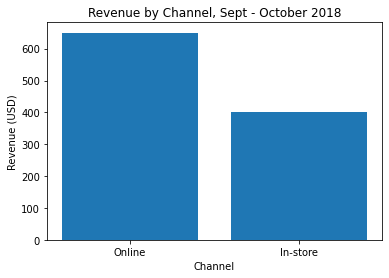

In [46]:
plt.bar(list(channel_revenue.keys()), list(channel_revenue.values()))
plt.title('Revenue by Channel, Sept - October 2018')
plt.xlabel('Channel')
plt.ylabel('Revenue (USD)')
plt.show()

# SQL Version:

Just watched an awesome video on the [How to Write Basic SQL Queries](https://youtu.be/41sWDXFVHD4)

Here's my Python solution for querying the tables (represented by the DataFrames above) in SQL:

```
SELECT order_id, channel FROM orders WHERE month = 9 OR month = 10;  # gets the rows from the orders table 


```